In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
data = np.load('3d_shape_points_data.npz')

In [5]:
print(data.files)

['points']


In [6]:
points = data['points']

In [7]:
print(type(points))
print(points.shape)
print(points[:5])

<class 'numpy.ndarray'>
(65536, 3)
[[9.998086   0.         0.        ]
 [9.994803   0.24535865 0.        ]
 [9.985485   0.4905554  0.        ]
 [9.970136   0.7354414  0.        ]
 [9.948765   0.9798679  0.        ]]


In [8]:
x, y, z = points[:, 0], points[:, 1], points[:, 2]

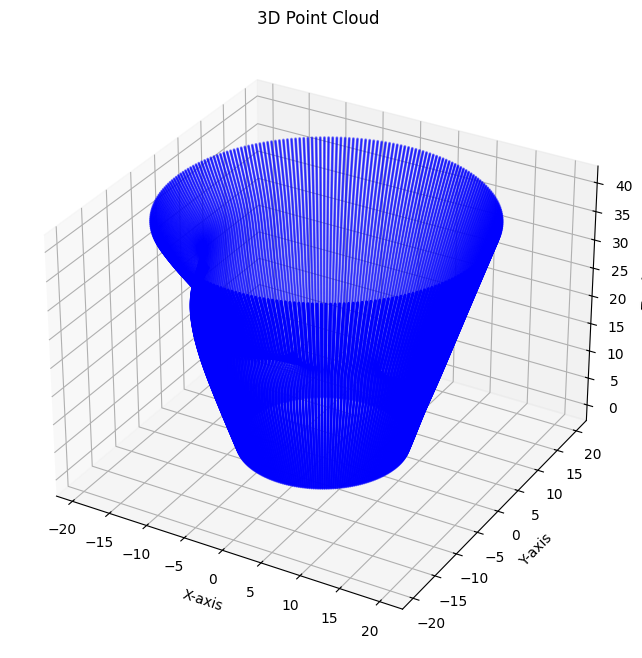

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue', s=1)
ax.set_title("3D Point Cloud")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()

In [10]:
hull = ConvexHull(points)

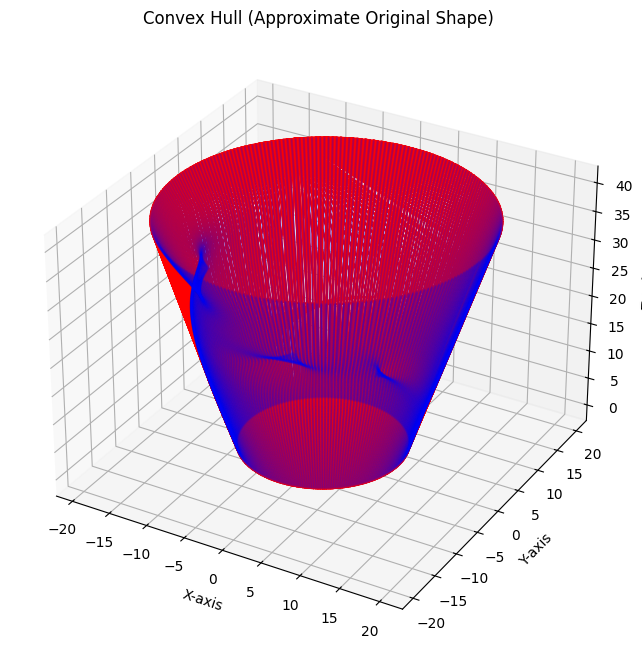

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue', alpha=0.1, s=1)

for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], 'r')

ax.set_title("Convex Hull (Approximate Original Shape)")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()

In [12]:
#Fit a surface to approximate the original shape
model = make_pipeline(PolynomialFeatures(degree=2), RANSACRegressor())
model.fit(points[:, :2], points[:, 2])  # Fit Z as a function of X and Y
z_pred = model.predict(points[:, :2])

In [13]:
#Identify deformations
residuals = np.abs(points[:, 2] - z_pred)
deformation_threshold = np.mean(residuals) + 2 * np.std(residuals)
deformed_points = points[residuals > deformation_threshold]
filtered_points = points[residuals <= deformation_threshold]

In [14]:
#Reconstruct the original shape
from scipy.spatial import Delaunay
tri = Delaunay(filtered_points[:, :2])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


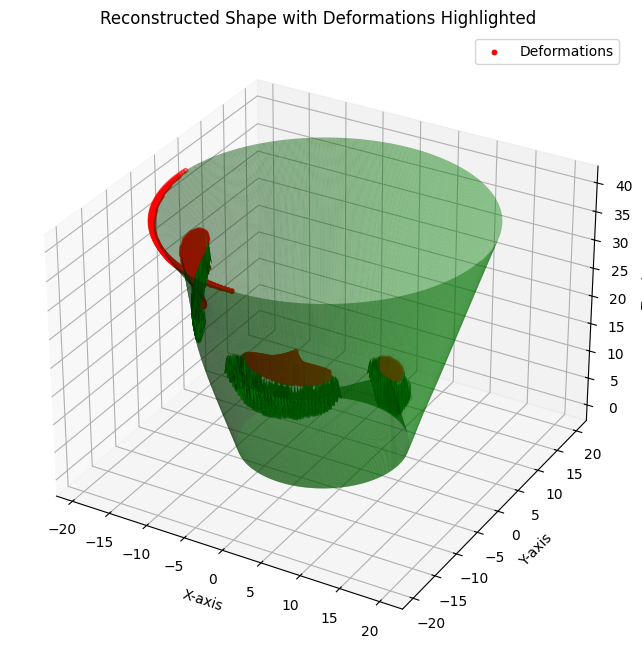

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(filtered_points[:, 0], filtered_points[:, 1], filtered_points[:, 2], triangles=tri.simplices, color='green', alpha=0.5)
ax.scatter(deformed_points[:, 0], deformed_points[:, 1], deformed_points[:, 2], color='red', s=10, label='Deformations')
ax.set_title("Reconstructed Shape with Deformations Highlighted")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()
plt.show()